# MLP Model to Predict Rainfall Outcome.

# Day 5

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
#Splitting Was Done from Year 2010. Same as in Paper.
train = pd.read_csv("Train.csv") 
test = pd.read_csv("Test.csv")

In [63]:
# Rename the column
train.rename(columns={'Rainfall amount (millimetres)': 'Rainfall outcome'}, inplace=True)

test.rename(columns={'Rainfall amount (millimetres)': 'Rainfall outcome'}, inplace=True)

In [64]:
# Convert values of Rainfall to 0 or 1
train['Rainfall outcome'] = train['Rainfall outcome'].apply(lambda x: 0 if x == 0 else 1)
test['Rainfall outcome'] = test['Rainfall outcome'].apply(lambda x: 0 if x == 0 else 1)

In [65]:
train

,Year,Month,Rainfall outcome,Maximum temperature (Degree C),Minimum temperature (Degree C)
0,1957,1,1,27.8,23.3
1,1957,1,1,27.8,22.8
2,1957,1,1,26.7,22.8
3,1957,1,1,27.2,23.3
4,1957,1,1,29.4,21.1
...,...,...,...,...,...
19718,2010,12,1,31.0,24.6
19719,2010,12,1,33.0,25.6
19720,2010,12,1,31.7,24.8
19721,2010,12,0,31.8,24.3


In [66]:
selected_columns = ['Month','Maximum temperature (Degree C)','Minimum temperature (Degree C)']
X_train = train[selected_columns]
X_test = test[selected_columns]

In [67]:
X_train

,Month,Maximum temperature (Degree C),Minimum temperature (Degree C)
0,1,27.8,23.3
1,1,27.8,22.8
2,1,26.7,22.8
3,1,27.2,23.3
4,1,29.4,21.1
...,...,...,...
19718,12,31.0,24.6
19719,12,33.0,25.6
19720,12,31.7,24.8
19721,12,31.8,24.3


In [68]:
column = ['Rainfall outcome']
y_train = train[column]
y_test = test[column]

In [69]:
y_train

,Rainfall outcome
0,1
1,1
2,1
3,1
4,1
...,...
19718,1
19719,1
19720,1
19721,0


In [70]:
X_train["Month"].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec'], inplace=True)
X_test["Month"].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec'], inplace=True)

/var/folders/xp/hmzg83255v1d6z_25j_3hk4m0000gn/T/ipykernel_4105/742789604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Month"].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec'], inplace=True)
/var/folders/xp/hmzg83255v1d6z_25j_3hk4m0000gn/T/ipykernel_4105/742789604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Month"].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec'], inplace=True)


In [71]:
#Applying OneHotEncoding to X_train
dummy = pd.get_dummies(X_train['Month'])
q = dummy.astype('int')
X_train_ohe = pd.concat([X_train,q],axis = 1)
X_train_ohe.drop('Month',axis = 1,inplace = True)

In [72]:
#OneHotEncoding to X_test
dummy = pd.get_dummies(X_test['Month'])
q = dummy.astype('int')
X_test_ohe = pd.concat([X_test,q],axis = 1)
X_test_ohe.drop('Month',axis = 1,inplace = True)
X_train_ohe

,Maximum temperature (Degree C),Minimum temperature (Degree C),April,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept
0,27.8,23.3,0,0,0,0,1,0,0,0,0,0,0,0
1,27.8,22.8,0,0,0,0,1,0,0,0,0,0,0,0
2,26.7,22.8,0,0,0,0,1,0,0,0,0,0,0,0
3,27.2,23.3,0,0,0,0,1,0,0,0,0,0,0,0
4,29.4,21.1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19718,31.0,24.6,0,0,1,0,0,0,0,0,0,0,0,0
19719,33.0,25.6,0,0,1,0,0,0,0,0,0,0,0,0
19720,31.7,24.8,0,0,1,0,0,0,0,0,0,0,0,0
19721,31.8,24.3,0,0,1,0,0,0,0,0,0,0,0,0


In [73]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
#Creating ANN Layers

model = Sequential()

model.add(Dense(32,activation='relu',input_dim=14))
model.add(Dense(24,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [74]:
#ANN Model Summary of Parameters (Weights + Bias)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                480       
                                                                 
 dense_2 (Dense)             (None, 24)                792       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,297
Trainable params: 1,297
Non-trainable params: 0
_________________________________________________________________


In [75]:
#Complining Model with Adam and Mean Sq. Error

model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['accuracy'])

In [77]:
#Fitting the model and running it with 100 epochs and a validations split of 20%

history = model.fit(X_train_ohe,y_train,batch_size=50,epochs=37,verbose=1,validation_split=0.2)

Epoch 1/37
316/316 [==============================] - 0s 548us/step - loss: 0.1793 - accuracy: 0.7214 - val_loss: 0.1746 - val_accuracy: 0.7470
Epoch 2/37
316/316 [==============================] - 0s 466us/step - loss: 0.1782 - accuracy: 0.7266 - val_loss: 0.1689 - val_accuracy: 0.7561
Epoch 3/37
316/316 [==============================] - 0s 452us/step - loss: 0.1776 - accuracy: 0.7253 - val_loss: 0.1747 - val_accuracy: 0.7356
Epoch 4/37
316/316 [==============================] - 0s 450us/step - loss: 0.1776 - accuracy: 0.7252 - val_loss: 0.1636 - val_accuracy: 0.7759
Epoch 5/37
316/316 [==============================] - 0s 450us/step - loss: 0.1772 - accuracy: 0.7251 - val_loss: 0.1614 - val_accuracy: 0.7787
Epoch 6/37
316/316 [==============================] - 0s 450us/step - loss: 0.1786 - accuracy: 0.7233 - val_loss: 0.1604 - val_accuracy: 0.7891
Epoch 7/37
316/316 [==============================] - 0s 451us/step - loss: 0.1775 - accuracy: 0.7238 - val_loss: 0.1697 - val_accuracy:

In [79]:
#Predicting values of Y by the ANN model.
y_pred = model.predict(X_test_ohe)
y_pred

109/109 [==============================] - 0s 263us/step


array([[0.9449468 ],
       [0.92846066],
       [0.7706187 ],
       ...,
       [0.5066059 ],
       [0.7717148 ],
       [0.9304864 ]], dtype=float32)

In [86]:
#Accuracy Score
y_pred = np.where(y_pred > 0.5, 1, 0)

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7326989619377162

Text(0.5, 1.0, 'Loss Function')

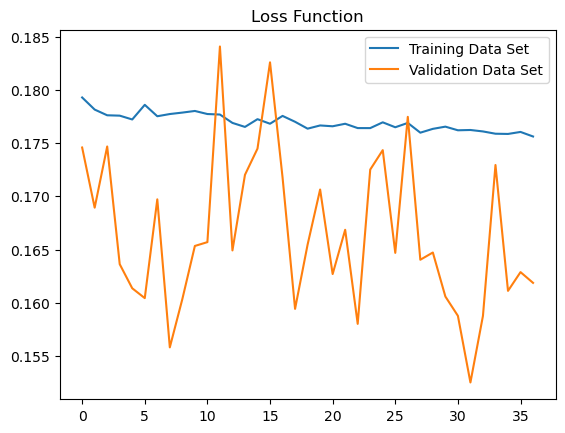

In [88]:
#Plotting Traing Loss Function vs Validation Loss Function  

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Training Data Set","Validation Data Set"])
plt.title("Loss Function")

Text(0.5, 1.0, 'Accuracy')

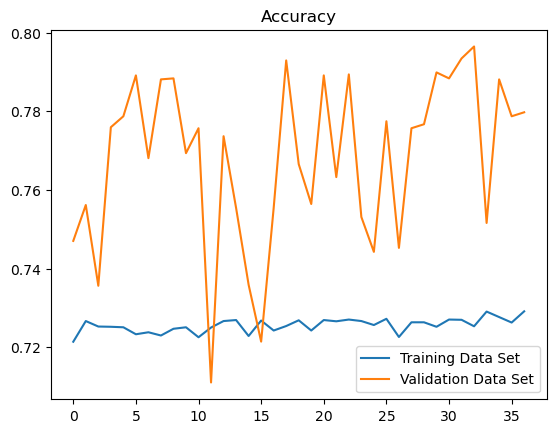

In [89]:
#Plotting Training Accuracy vs Validation Set Accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["Training Data Set","Validation Data Set"])
plt.title("Accuracy")